In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.ensemble import RandomForestRegressor
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [5]:
df = pd.read_excel("datablog.xlsx", sheet_name="leads")

C:\Users\shari\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell I2 is marked as a date but the serial value 6090311554 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\Users\shari\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell I3 is marked as a date but the serial value 4466187121 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\Users\shari\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell I4 is marked as a date but the serial value 4290641357 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\Users\shari\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell I5 is marked as a date but the serial value 8711902674 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\Users\shari\anaconda3\lib\site-packages\openpyxl\worksheet\_r

In [6]:
df.columns

Index(['Email', 'Current Status', 'Type', 'Month', 'Date',
       'Started Free Trial?', 'Decision Maker', 'demo_date', 'Phone Number',
       'Designation', 'Employee Size', 'Visited Pricing ',
       'Visited Integrations ', 'Visited Platform ', 'City/State', 'Country',
       'Keyword if any', 'Reference 1', 'Blog_traffic', 'Initial Referrer',
       'Referrer URL', 'Acquisition Source', 'When do you need to Solution',
       'Sources', 'Destinations', 'message'],
      dtype='object')

<AxesSubplot:>

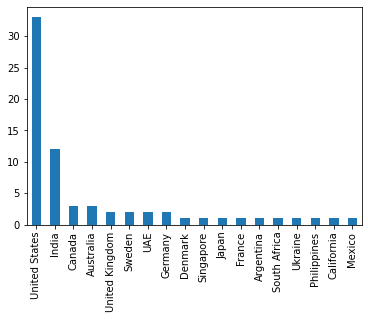

In [7]:
df['Country'].value_counts().plot(kind='bar')

## 

<AxesSubplot:>

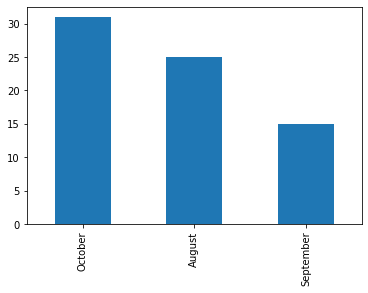

In [8]:
df['Month'].value_counts().plot(kind='bar')

<AxesSubplot:>

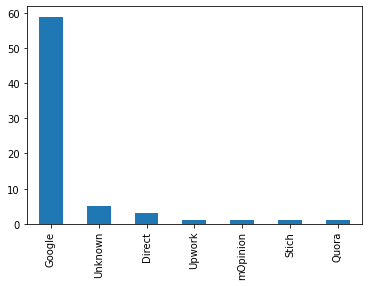

In [9]:
df['Reference 1'].value_counts().plot(kind='bar')

<AxesSubplot:>

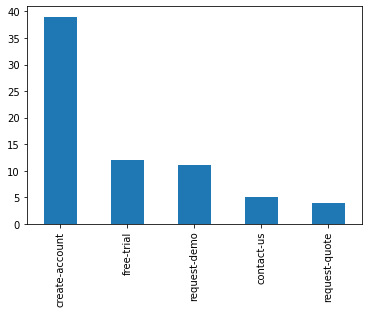

In [10]:
df['Type'].value_counts().plot(kind='bar')

In [11]:
df.shape

(71, 26)

In [12]:
df.value_counts(["Type", "Month"])

Type            Month    
create-account  October      21
                August        9
                September     9
free-trial      August        8
request-demo    August        4
                October       4
free-trial      October       3
request-demo    September     3
contact-us      August        2
                October       2
request-quote   August        2
contact-us      September     1
free-trial      September     1
request-quote   October       1
                September     1
dtype: int64

In [13]:
pd.crosstab(df.Type,df.Month)

Month,August,October,September
Type,,,
contact-us,2,2,1
create-account,9,21,9
free-trial,8,3,1
request-demo,4,4,3
request-quote,2,1,1


In [14]:
new_df = df[["Type","Employee Size"]]
new_df = new_df.dropna()
new_df.groupby('Type').mean()
# ['Employee Size']

,Employee Size
Type,
contact-us,2321.333333
create-account,829.300000
free-trial,1148.333333
request-demo,1614.363636
request-quote,54.250000


In [15]:
new_df_1 = df[["Current Status","Employee Size"]]
new_df_1 = new_df_1.dropna()
new_df_1.groupby('Current Status').mean()

,Employee Size
Current Status,
Contact Awaited,55.000000
Contact Established,6780.500000
Converted,166.000000
Deferred for Future,100.000000
Demo Given,137.500000
Demo Scheduled,5605.000000
Free Trial Activated,22.500000
No Response - Email,840.038462
Not Interested,693.571429


<AxesSubplot:>

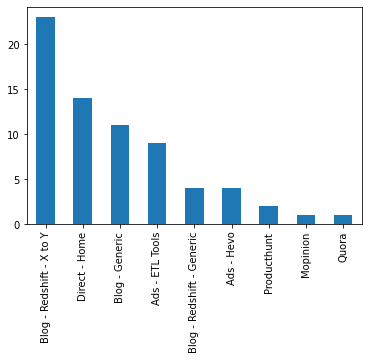

In [16]:
df['Acquisition Source'].value_counts().plot(kind='bar')

<AxesSubplot:>

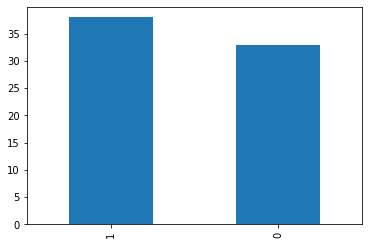

In [17]:
df['Blog_traffic'].value_counts().plot(kind='bar')

<AxesSubplot:>

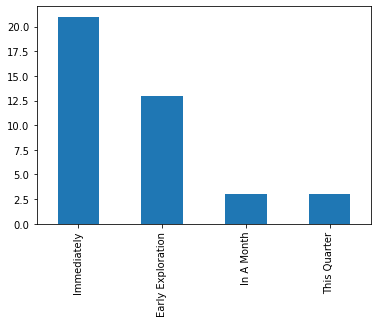

In [18]:
df['When do you need to Solution'].value_counts().plot(kind='bar')

In [19]:
pd.crosstab(df['When do you need to Solution'],df['Current Status'])

Current Status,Contact Awaited,Converted,Deferred for Future,Demo Given,Demo Scheduled,Free Trial Activated,No Response - Email,No Show - Demo,Not Interested
When do you need to Solution,,,,,,,,,
Early Exploration,1,0,1,0,0,2,3,0,6
Immediately,0,2,1,2,1,0,9,2,4
In A Month,0,0,0,0,0,1,1,0,1
This Quarter,1,1,0,0,0,0,1,0,0


In [20]:
pd.crosstab(df['Month'],df['Current Status'])

Current Status,Contact Awaited,Contact Established,Converted,Deferred for Future,Demo Given,Demo Scheduled,Free Trial Activated,No Response - Email,No Show - Demo,Not Interested,Pricing Requested
Month,,,,,,,,,,,
August,0,0,3,1,1,0,0,14,0,6,0
October,2,2,0,1,2,3,3,8,2,7,1
September,0,0,3,2,0,0,0,6,0,4,0


In [21]:
pd.crosstab(df['Month'],df['Type'])

Type,contact-us,create-account,free-trial,request-demo,request-quote
Month,,,,,
August,2,9,8,4,2
October,2,21,3,4,1
September,1,9,1,3,1


In [22]:
#pd.crosstab(df['When do you need to Solution'],df['Current Status'])

In [23]:
df_blog = pd.read_excel("datablog.xlsx", sheet_name="blogs")

In [24]:
df_blog

,Blog Url,2018-08-01 00:00:00,2018-08-02 00:00:00,2018-08-03 00:00:00,2018-08-04 00:00:00,2018-08-05 00:00:00,2018-08-06 00:00:00,2018-08-07 00:00:00,2018-08-08 00:00:00,2018-08-09 00:00:00,...,2018-10-22 00:00:00,2018-10-23 00:00:00,2018-10-24 00:00:00,2018-10-25 00:00:00,2018-10-26 00:00:00,2018-10-27 00:00:00,2018-10-28 00:00:00,2018-10-29 00:00:00,2018-10-30 00:00:00,2018-10-31 00:00:00
0,https://abc.com/blog/redshift-vacuum-and-analyze/,32,15,25,5,4,25,30,26,27,...,31,28,19,17,24,5,14,40,31,17
1,https://abc.com/blog/amazon-redshift-pros-and-...,25,15,19,1,1,20,19,17,16,...,27,24,24,23,19,6,20,30,20,19
2,https://abc.com/blog/redshift-distribution-keys/,13,15,10,1,3,16,25,18,16,...,34,38,29,33,22,5,14,34,44,37
3,https://abc.com/blog/postgresql-to-redshift-etl/,25,16,16,8,7,23,20,13,13,...,18,24,22,16,11,5,9,21,29,15
4,https://abc.com/blog/redshift-sort-keys-choosi...,8,17,18,5,8,15,21,20,22,...,32,34,26,35,26,5,14,28,54,48
5,https://abc.com/blog/mysql-to-redshift-etl/,5,4,5,2,1,9,5,4,6,...,11,15,10,6,14,0,6,14,5,5
6,https://abc.com/blog/redshift-architecture/,5,5,7,3,5,12,5,5,5,...,10,9,11,8,2,3,6,9,9,7
7,https://abc.com/blog/druid-vs-redshift-data-wa...,12,6,5,0,3,7,7,4,3,...,18,8,12,4,7,2,3,10,3,9
8,https://abc.com/blog/redshift-vs-bigquery/,10,3,5,5,2,4,9,7,6,...,5,0,3,2,4,1,1,1,0,1
9,https://abc.com/blog/mongodb-to-redshift-etl/,1,2,5,2,2,3,3,4,1,...,5,4,2,2,3,0,0,4,4,6


In [25]:
df_blog['Title'] = df_blog['Blog Url'].str.split('/', expand=True)[4]
df_blog['Title']

0                     redshift-vacuum-and-analyze
1                   amazon-redshift-pros-and-cons
2                      redshift-distribution-keys
3                      postgresql-to-redshift-etl
4     redshift-sort-keys-choosing-best-sort-style
5                           mysql-to-redshift-etl
6                           redshift-architecture
7                druid-vs-redshift-data-warehouse
8                            redshift-vs-bigquery
9                         mongodb-to-redshift-etl
10                                amazon-redshift
11                                amazon-redshift
12       migrate-data-from-postgresql-to-redshift
13                                       redshift
14                                       redshift
15                                       REDSHIFT
16                          mysql-to-redshift-etl
17                          mysql-to-redshift-etl
18                                       REDSHIFT
19                                       REDSHIFT


In [26]:
df_blog = df_blog.drop('Blog Url', axis = 1)

df_blog

,2018-08-01 00:00:00,2018-08-02 00:00:00,2018-08-03 00:00:00,2018-08-04 00:00:00,2018-08-05 00:00:00,2018-08-06 00:00:00,2018-08-07 00:00:00,2018-08-08 00:00:00,2018-08-09 00:00:00,2018-08-10 00:00:00,...,2018-10-23 00:00:00,2018-10-24 00:00:00,2018-10-25 00:00:00,2018-10-26 00:00:00,2018-10-27 00:00:00,2018-10-28 00:00:00,2018-10-29 00:00:00,2018-10-30 00:00:00,2018-10-31 00:00:00,Title
0,32,15,25,5,4,25,30,26,27,26,...,28,19,17,24,5,14,40,31,17,redshift-vacuum-and-analyze
1,25,15,19,1,1,20,19,17,16,11,...,24,24,23,19,6,20,30,20,19,amazon-redshift-pros-and-cons
2,13,15,10,1,3,16,25,18,16,11,...,38,29,33,22,5,14,34,44,37,redshift-distribution-keys
3,25,16,16,8,7,23,20,13,13,20,...,24,22,16,11,5,9,21,29,15,postgresql-to-redshift-etl
4,8,17,18,5,8,15,21,20,22,16,...,34,26,35,26,5,14,28,54,48,redshift-sort-keys-choosing-best-sort-style
5,5,4,5,2,1,9,5,4,6,6,...,15,10,6,14,0,6,14,5,5,mysql-to-redshift-etl
6,5,5,7,3,5,12,5,5,5,2,...,9,11,8,2,3,6,9,9,7,redshift-architecture
7,12,6,5,0,3,7,7,4,3,3,...,8,12,4,7,2,3,10,3,9,druid-vs-redshift-data-warehouse
8,10,3,5,5,2,4,9,7,6,2,...,0,3,2,4,1,1,1,0,1,redshift-vs-bigquery
9,1,2,5,2,2,3,3,4,1,5,...,4,2,2,3,0,0,4,4,6,mongodb-to-redshift-etl


In [27]:
df_blog = df_blog.set_index('Title')

In [28]:
df_blog

,2018-08-01,2018-08-02,2018-08-03,2018-08-04,2018-08-05,2018-08-06,2018-08-07,2018-08-08,2018-08-09,2018-08-10,...,2018-10-22,2018-10-23,2018-10-24,2018-10-25,2018-10-26,2018-10-27,2018-10-28,2018-10-29,2018-10-30,2018-10-31
Title,,,,,,,,,,,,,,,,,,,,,
redshift-vacuum-and-analyze,32,15,25,5,4,25,30,26,27,26,...,31,28,19,17,24,5,14,40,31,17
amazon-redshift-pros-and-cons,25,15,19,1,1,20,19,17,16,11,...,27,24,24,23,19,6,20,30,20,19
redshift-distribution-keys,13,15,10,1,3,16,25,18,16,11,...,34,38,29,33,22,5,14,34,44,37
postgresql-to-redshift-etl,25,16,16,8,7,23,20,13,13,20,...,18,24,22,16,11,5,9,21,29,15
redshift-sort-keys-choosing-best-sort-style,8,17,18,5,8,15,21,20,22,16,...,32,34,26,35,26,5,14,28,54,48
mysql-to-redshift-etl,5,4,5,2,1,9,5,4,6,6,...,11,15,10,6,14,0,6,14,5,5
redshift-architecture,5,5,7,3,5,12,5,5,5,2,...,10,9,11,8,2,3,6,9,9,7
druid-vs-redshift-data-warehouse,12,6,5,0,3,7,7,4,3,3,...,18,8,12,4,7,2,3,10,3,9
redshift-vs-bigquery,10,3,5,5,2,4,9,7,6,2,...,5,0,3,2,4,1,1,1,0,1


In [29]:
result = df_blog.transpose()

result

Title,redshift-vacuum-and-analyze,amazon-redshift-pros-and-cons,redshift-distribution-keys,postgresql-to-redshift-etl,redshift-sort-keys-choosing-best-sort-style,mysql-to-redshift-etl,redshift-architecture,druid-vs-redshift-data-warehouse,redshift-vs-bigquery,mongodb-to-redshift-etl,...,redshift,postgres-to-redshift-etl,postgresql-to-redshift-etl,postgresql-to-redshift-etl,redshift-architecture,redshift-distribution-keys,redshift-distribution-keys,redshift-sort-keys-choosing-best-sort-style,redshift-vacuum-and-analyze,redshift-vacuum-and-analyze
2018-08-01,32,25,13,25,8,5,5,12,10,1,...,0,0,0,0,0,0,0,0,0,0
2018-08-02,15,15,15,16,17,4,5,6,3,2,...,0,0,0,0,0,0,0,0,0,0
2018-08-03,25,19,10,16,18,5,7,5,5,5,...,0,0,0,0,0,0,0,0,0,0
2018-08-04,5,1,1,8,5,2,3,0,5,2,...,0,0,0,0,0,0,0,0,0,0
2018-08-05,4,1,3,7,8,1,5,3,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-27,5,6,5,5,5,0,3,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2018-10-28,14,20,14,9,14,6,6,3,1,0,...,1,0,0,0,0,0,0,0,0,0
2018-10-29,40,30,34,21,28,14,9,10,1,4,...,0,0,0,0,0,0,0,0,0,0
2018-10-30,31,20,44,29,54,5,9,3,0,4,...,0,0,0,0,0,0,0,0,0,0


In [30]:
result.sum(axis = 0, skipna = True)

Title
redshift-vacuum-and-analyze                    1741
amazon-redshift-pros-and-cons                  1471
redshift-distribution-keys                     1370
postgresql-to-redshift-etl                     1329
redshift-sort-keys-choosing-best-sort-style    1311
mysql-to-redshift-etl                           590
redshift-architecture                           540
druid-vs-redshift-data-warehouse                511
redshift-vs-bigquery                            324
mongodb-to-redshift-etl                         312
amazon-redshift                                  62
amazon-redshift                                  20
migrate-data-from-postgresql-to-redshift          9
redshift                                          6
redshift                                          6
REDSHIFT                                          5
mysql-to-redshift-etl                             3
mysql-to-redshift-etl                             3
REDSHIFT                                          3
REDSHI